# Data Wrangling

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

-load data
-check head
-explore data (column names, non-null entries, dtype)
-check species (notice small amount of robusta data, drop robusta?)
-explore altitude data
    -create altitude df
    -look at rows that have ft for unit_of_measurement
    -compare altitude to high,low, mean (they are already converted)
    -check for outliers
    -conclusion: use low, high, mean altitude columns for analysis
-explore numerical scoring data (total_cup_points, aroma, flavor, aftertaste, acidity, body, balance, uniformity, clean cup, sweetness, cupper points, cat one defects, cat two defects)
    -range, means
    -check to make sure total_cup_points is the addition of all the scoring points, minus defects

## Load Coffee Data

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv")

In [4]:
data.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


## Explore Data

In [58]:
data[['country_of_origin','region','farm_name']]

,country_of_origin,region,farm_name
0,Ethiopia,guji-hambela,metad plc
1,Ethiopia,guji-hambela,metad plc
2,Guatemala,NaN,"san marcos barrancas ""san cristobal cuch"
3,Ethiopia,oromia,yidnekachew dabessa coffee plantation
4,Ethiopia,guji-hambela,metad plc
...,...,...,...
1334,Ecuador,"san juan, playas",robustasa
1335,Ecuador,"san juan, playas",robustasa
1336,United States,"kwanza norte province, angola",fazenda cazengo
1337,India,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1339 non-null   float64
 1   species                1339 non-null   object 
 2   owner                  1332 non-null   object 
 3   country_of_origin      1338 non-null   object 
 4   farm_name              980 non-null    object 
 5   lot_number             276 non-null    object 
 6   mill                   1021 non-null   object 
 7   ico_number             1182 non-null   object 
 8   company                1130 non-null   object 
 9   altitude               1113 non-null   object 
 10  region                 1280 non-null   object 
 11  producer               1107 non-null   object 
 12  number_of_bags         1339 non-null   int64  
 13  bag_weight             1339 non-null   object 
 14  in_country_partner     1339 non-null   object 
 15  harv

In [6]:
data.describe()

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,82.089851,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,0.088379,0.479462,0.173393,3.556385,1750.713315,1799.347775,1775.030545
std,3.500575,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,0.048287,2.549683,0.832121,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,81.080000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,82.500000,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,83.670000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,90.580000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [7]:
data.describe(include=object)

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,grading_date,owner_1,variety,processing_method,color,expiration,certification_body,certification_address,certification_contact,unit_of_measurement
count,1339,1332,1338,980,276,1021,1182,1130,1113,1280,...,1339,1332,1113,1169,1121,1339,1339,1339,1339,1339
unique,2,315,36,571,227,459,846,281,396,356,...,567,319,29,5,4,566,26,32,29,2
top,Arabica,juan luis alvarado romero,Mexico,various,1,beneficio ixchel,0,"unex guatemala, s.a.",1100,huila,...,"July 11th, 2012",Juan Luis Alvarado Romero,Caturra,Washed / Wet,Green,"December 26th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m
freq,1311,155,236,47,18,90,77,86,43,112,...,25,155,256,815,870,25,313,293,295,1157


### Counts and Percents Unique Values

In [8]:
for column in data:
    counts = data[column].value_counts()
    percentage = data[column].value_counts(normalize=True)*100
    print(counts,percentage)

83.00    39
83.17    38
82.42    32
82.75    30
82.33    29
         ..
72.33     1
86.83     1
89.00     1
77.00     1
89.75     1
Name: total_cup_points, Length: 180, dtype: int64 83.00    2.912621
83.17    2.837939
82.42    2.389843
82.75    2.240478
82.33    2.165795
           ...   
72.33    0.074683
86.83    0.074683
89.00    0.074683
77.00    0.074683
89.75    0.074683
Name: total_cup_points, Length: 180, dtype: float64
Arabica    1311
Robusta      28
Name: species, dtype: int64 Arabica    97.908887
Robusta     2.091113
Name: species, dtype: float64
juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
gloria antonieta escobar urrutia      1
gabriel bernardo rivas ross           1
enrique mitre lopez                   1
andrea bernal                         1
nomura trading co., ltd.            

In [9]:
for column in data:
    counts = data[column].value_counts()
    print(counts)

83.00    39
83.17    38
82.42    32
82.75    30
82.33    29
         ..
72.33     1
86.83     1
89.00     1
77.00     1
89.75     1
Name: total_cup_points, Length: 180, dtype: int64
Arabica    1311
Robusta      28
Name: species, dtype: int64
juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
gloria antonieta escobar urrutia      1
gabriel bernardo rivas ross           1
enrique mitre lopez                   1
andrea bernal                         1
nomura trading co., ltd.              1
Name: owner, Length: 315, dtype: int64
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                 

Text(0.5, 0, 'Count')

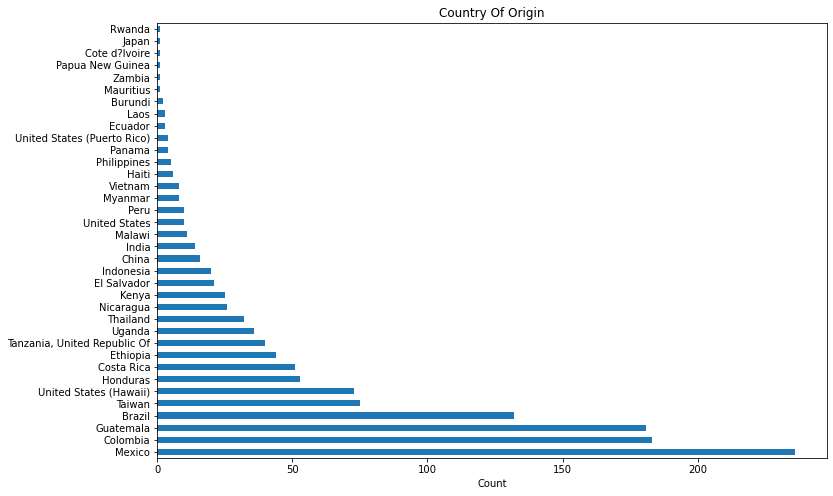

In [10]:
data.country_of_origin.value_counts().plot(kind='barh', width = .5, figsize = (12,8))
plt.title('Country Of Origin')
plt.xlabel('Count')

In [11]:
country_cup_points_means = data.groupby('country_of_origin')[['total_cup_points']].mean().sort_values(by='total_cup_points', ascending=False)
country_cup_points_means

,total_cup_points
country_of_origin,
Papua New Guinea,85.750000
Ethiopia,85.484091
Japan,84.670000
United States,84.433000
Kenya,84.309600
Panama,83.707500
Uganda,83.451944
Colombia,83.106557
El Salvador,83.052857


In [12]:
coffee_df1 = data.drop(['farm_name','owner', 'producer','certification_body', 'certification_address','certification_contact' ,'lot_number','mill','ico_number', 'company','in_country_partner','owner_1',], axis=1)

In [13]:
coffee_df1

,total_cup_points,species,country_of_origin,altitude,region,number_of_bags,bag_weight,harvest_year,grading_date,variety,...,moisture,category_one_defects,quakers,color,category_two_defects,expiration,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,Ethiopia,1950-2200,guji-hambela,300,60 kg,2014,"April 4th, 2015",NaN,...,0.12,0,0.0,Green,0,"April 3rd, 2016",m,1950.0,2200.0,2075.0
1,89.92,Arabica,Ethiopia,1950-2200,guji-hambela,300,60 kg,2014,"April 4th, 2015",Other,...,0.12,0,0.0,Green,1,"April 3rd, 2016",m,1950.0,2200.0,2075.0
2,89.75,Arabica,Guatemala,1600 - 1800 m,NaN,5,1,NaN,"May 31st, 2010",Bourbon,...,0.00,0,0.0,NaN,0,"May 31st, 2011",m,1600.0,1800.0,1700.0
3,89.00,Arabica,Ethiopia,1800-2200,oromia,320,60 kg,2014,"March 26th, 2015",NaN,...,0.11,0,0.0,Green,2,"March 25th, 2016",m,1800.0,2200.0,2000.0
4,88.83,Arabica,Ethiopia,1950-2200,guji-hambela,300,60 kg,2014,"April 4th, 2015",Other,...,0.12,0,0.0,Green,2,"April 3rd, 2016",m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,78.75,Robusta,Ecuador,NaN,"san juan, playas",1,2 kg,2016,"January 19th, 2016",NaN,...,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",m,NaN,NaN,NaN
1335,78.08,Robusta,Ecuador,40,"san juan, playas",1,2 kg,2016,"January 19th, 2016",NaN,...,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",m,40.0,40.0,40.0
1336,77.17,Robusta,United States,795 meters,"kwanza norte province, angola",1,1 kg,2014,"December 23rd, 2014",NaN,...,0.00,0,0.0,NaN,6,"December 23rd, 2015",m,795.0,795.0,795.0
1337,75.08,Robusta,India,NaN,NaN,1,5 lbs,2013,"August 25th, 2014",NaN,...,0.10,20,0.0,Green,1,"August 25th, 2015",m,NaN,NaN,NaN


In [14]:
color_means = data.groupby('color')[['total_cup_points']].mean().sort_values(by='total_cup_points', ascending=False)
color_means

,total_cup_points
color,
Bluish-Green,82.629298
Blue-Green,82.588471
Green,81.888000
None,80.407885


In [29]:
data.unit_of_measurement

0       m
1       m
2       m
3       m
4       m
       ..
1334    m
1335    m
1336    m
1337    m
1338    m
Name: unit_of_measurement, Length: 1339, dtype: object

In [31]:
data.unit_of_measurement.unique()

array(['m', 'ft'], dtype=object)

## Create Sub-Dataframe of Altitude data

In [39]:
alt_df = data[['altitude', 'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']]

In [43]:
alt_df_feet = alt_df[alt_df.unit_of_measurement == 'ft']

In [44]:
alt_df_feet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 13 to 1309
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   altitude              111 non-null    object 
 1   unit_of_measurement   182 non-null    object 
 2   altitude_low_meters   111 non-null    float64
 3   altitude_high_meters  111 non-null    float64
 4   altitude_mean_meters  111 non-null    float64
dtypes: float64(3), object(2)
memory usage: 8.5+ KB


In [51]:
alt_df_feet

,altitude,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
13,2000 ft,ft,609.60,609.60,609.60
36,NaN,ft,NaN,NaN,NaN
37,NaN,ft,NaN,NaN,NaN
51,1400ft,ft,426.72,426.72,426.72
57,5000,ft,1524.00,1524.00,1524.00
...,...,...,...,...,...
1286,NaN,ft,NaN,NaN,NaN
1287,4300,ft,1310.64,1310.64,1310.64
1291,NaN,ft,NaN,NaN,NaN
1296,NaN,ft,NaN,NaN,NaN


pandas.core.series.Series